In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anishpai/ames-housing-dataset-missing")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 192k/192k [00:00<00:00, 254kB/s]

Extracting files...


Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\anishpai\ames-housing-dataset-missing\versions\3


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:/Users/pc/.cache/kagglehub/datasets/anishpai/ames-housing-dataset-missing/versions/3/TrainData.csv")

X = df[['GrLivArea', 'OverallQual', 'YearBuilt']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


RMSE: 33716.32578167747
R²: 0.851793705572648


G:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


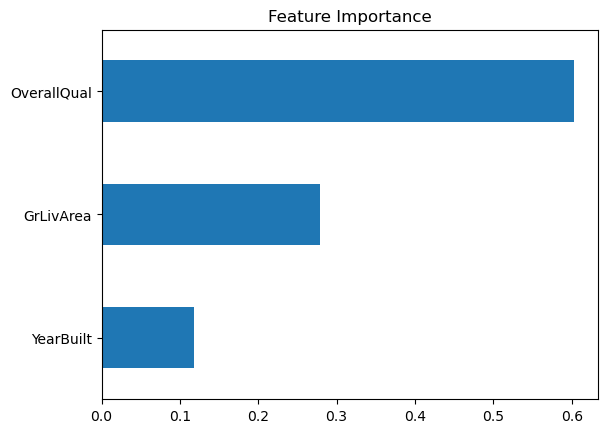

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

pd.Series(importance, index=features).sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()